# 1. Install Dependencies and Setup

In [1]:
pip_list = !pip list
packages = ["numpy","tensorflow","tensorflow-gpu","opencv-python","matplotlib"]
for package in packages:
    if not pip_list.grep(package):
        !pip3 install {package}

print("Package installations completed.")

Package installations completed.


In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
path1= 'c:\\Users\\msoli\\uae-chapter-road-inspection'
data_dir = os.path.join(path1,'src/data') 

In [6]:
os.listdir(data_dir)

['Cracks', 'Groove']

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
# reading image sample
image = cv2.imread(os.path.join(data_dir,'Groove','Groove_1164.jpg'))
image.shape


(300, 533, 3)

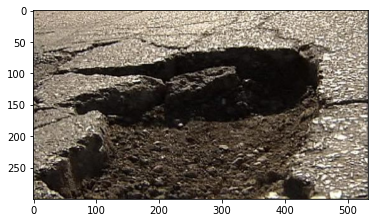

In [9]:
from matplotlib import pyplot as plt

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));


In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [11]:
#tf.data.Dataset??

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
# building data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(300, 300))

Found 2096 files belonging to 2 classes.


In [14]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
# loop
data_iterator = data.as_numpy_iterator()

In [16]:
# Get another batch from iterator
batch = data_iterator.next()

In [17]:
batch[0][0]

array([[[ 49.54578 ,  57.54578 ,  34.545776],
        [ 36.589333,  44.589333,  21.589333],
        [ 58.04444 ,  66.077774,  41.911102],
        ...,
        [ 48.581276,  63.581276,  40.581276],
        [ 32.45264 ,  45.45264 ,  28.45264 ],
        [ 28.402885,  39.402885,  25.402885]],

       [[ 60.979336,  68.97933 ,  45.979336],
        [ 44.336   ,  52.336   ,  31.335999],
        [ 82.11333 ,  90.12333 ,  66.77    ],
        ...,
        [ 20.346607,  35.346607,  12.346607],
        [ 25.284008,  36.284008,  20.284008],
        [ 20.11067 ,  31.11067 ,  17.11067 ]],

       [[ 67.19889 ,  75.19889 ,  52.61222 ],
        [ 32.57    ,  40.57    ,  19.570002],
        [ 58.22778 ,  66.22778 ,  44.833336],
        ...,
        [ 29.72225 ,  43.722248,  20.72225 ],
        [ 24.130026,  35.130024,  19.130026],
        [ 30.597778,  38.59778 ,  25.597778]],

       ...,

       [[110.54004 , 113.54004 , 104.54004 ],
        [113.689964, 114.689964, 106.689964],
        [121.666664, 1

In [18]:
# Images represented as numpy arrays
batch[0].shape

(32, 300, 300, 3)

In [19]:
# Class 1 = Groove
# Class 0 = Crack
batch[1]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

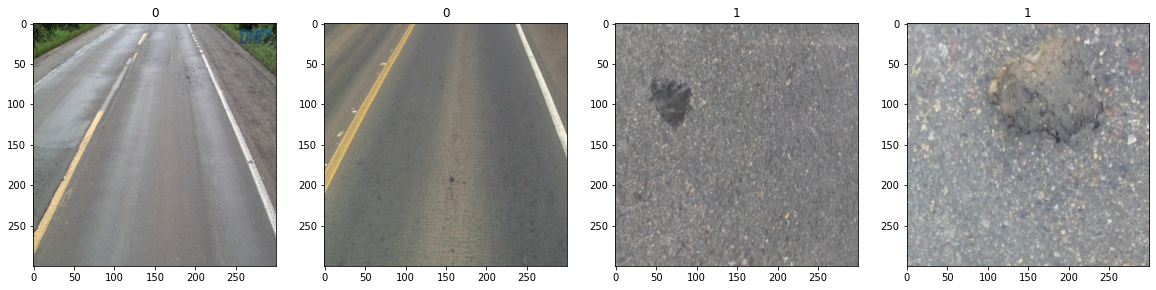

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Class 1 = Groove
# Class 0 = Crack

In [21]:
batch[0].min()

0.0

In [22]:
batch[0].max()

255.0

# 4. Scale Data
scale is helping our deep learning model generalize faster and produces better results

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
data.as_numpy_iterator().next()[0].max()

1.0

# 5. Split Data

In [25]:
len(data)

66

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
train_size, val_size, test_size

(46, 13, 6)

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
len(train)

46

# 6. Build Deep Learning Model
build deep learning model using the keras sequential api

In [30]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

In [33]:
#MaxPooling2D??

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(300,300,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
#model.compile??

In [36]:
#tf.optimizers??

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 16)       0

# 7. Train

In [39]:
logdir=r'C:\Users\msoli\uae-chapter-road-inspection\src\logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

'''
epochs is how long we're actually
going to go ahead and train for, and 
one epoch is one run over our entire
training set of data.
'''

Epoch 1/10
46/46 [==============================] - 54s 1s/step - loss: 0.6714 - accuracy: 0.6209 - val_loss: 0.6515 - val_accuracy: 0.7067
Epoch 2/10
46/46 [==============================] - 52s 1s/step - loss: 0.4742 - accuracy: 0.7731 - val_loss: 0.3717 - val_accuracy: 0.8317
Epoch 3/10
46/46 [==============================] - 52s 1s/step - loss: 0.4928 - accuracy: 0.7446 - val_loss: 0.4775 - val_accuracy: 0.6418
Epoch 4/10
46/46 [==============================] - 51s 1s/step - loss: 0.3642 - accuracy: 0.8383 - val_loss: 0.5828 - val_accuracy: 0.7788
Epoch 5/10
46/46 [==============================] - 51s 1s/step - loss: 0.3388 - accuracy: 0.8580 - val_loss: 0.3428 - val_accuracy: 0.8702
Epoch 6/10
46/46 [==============================] - 51s 1s/step - loss: 0.2817 - accuracy: 0.8798 - val_loss: 0.2679 - val_accuracy: 0.8894
Epoch 7/10
46/46 [==============================] - 51s 1s/step - loss: 0.2728 - accuracy: 0.8940 - val_loss: 0.2872 - val_accuracy: 0.8750
Epoch 8/10
46/46 [==

"\nepochs is how long we're actually\ngoing to go ahead and train for, and \none epoch is one run over our entire\ntraining set of data.\n"

In [42]:
hist.history

{'loss': [0.6713594794273376,
  0.474196195602417,
  0.4927736222743988,
  0.36417630314826965,
  0.3387875258922577,
  0.28174397349357605,
  0.2727992534637451,
  0.21385012567043304,
  0.21637435257434845,
  0.1689872294664383],
 'accuracy': [0.6209239363670349,
  0.773097813129425,
  0.7445651888847351,
  0.8383151888847351,
  0.858016312122345,
  0.879755437374115,
  0.89402174949646,
  0.9116848111152649,
  0.91847825050354,
  0.9354619383811951],
 'val_loss': [0.6514946222305298,
  0.3717228174209595,
  0.47746747732162476,
  0.5828499794006348,
  0.3428150415420532,
  0.2678726017475128,
  0.2872381806373596,
  0.22340525686740875,
  0.2943674325942993,
  0.3446730375289917],
 'val_accuracy': [0.7067307829856873,
  0.8317307829856873,
  0.6418269276618958,
  0.7788461446762085,
  0.870192289352417,
  0.8894230723381042,
  0.875,
  0.8966346383094788,
  0.8846153616905212,
  0.8557692170143127]}

# 8. Plot Performance

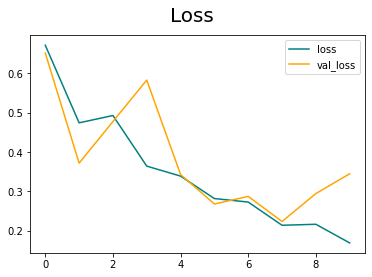

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

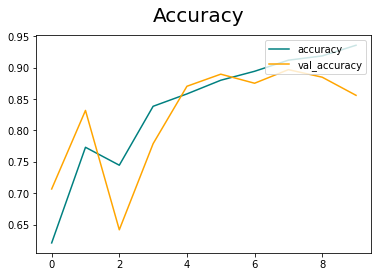

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper right")
plt.show()

# 9. Evaluate

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
len(test)

6

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 167ms/step


In [49]:
pre.result().numpy(), re.result().numpy(), acc.result().numpy()

(0.8, 1.0, 0.859375)

# 10. Test

In [50]:
import cv2

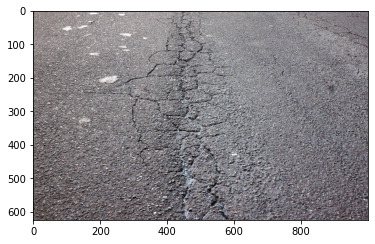

In [51]:
img = cv2.imread(r'C:\Users\msoli\uae-chapter-road-inspection\CrackTest2.jpg')
plt.imshow(img)
plt.show()

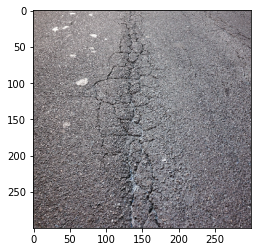

In [52]:
resize = tf.image.resize(img, (300,300))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 67ms/step


array([[0.01657996]], dtype=float32)

In [54]:
if yhat > 0.5: 
    print(f'Predicted class is Groove')
else:
    print(f'Predicted class is Crack')

Predicted class is Crack


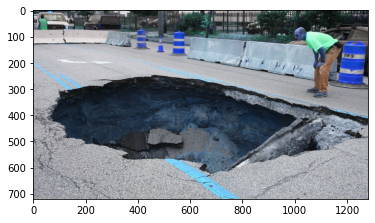

In [55]:
img2 = cv2.imread(r'C:\Users\msoli\uae-chapter-road-inspection\grooveTest2.jpg')
plt.imshow(img2)
plt.show()

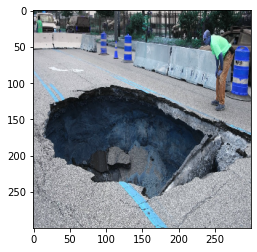

In [56]:
resize2 = tf.image.resize(img2, (300,300))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize2/255, 0))
yhat

1/1 [==============================] - 0s 24ms/step


array([[0.9999988]], dtype=float32)

In [58]:
if yhat > 0.5: 
    print(f'Predicted class is Groove')
else:
    print(f'Predicted class is Crack')

Predicted class is Groove


# 11. Save the Model

In [59]:
from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models','CrackGrooveClassifierModel.h5'))

In [61]:
new_model = load_model(os.path.join('models','CrackGrooveClassifierModel.h5'))

In [62]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 64ms/step


array([[0.01657996]], dtype=float32)